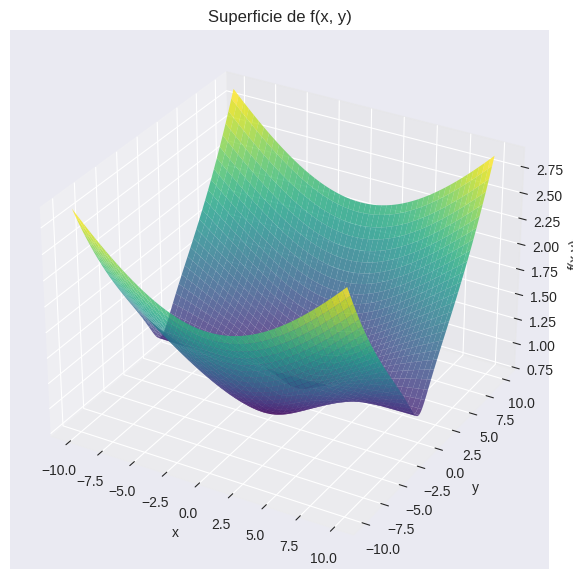

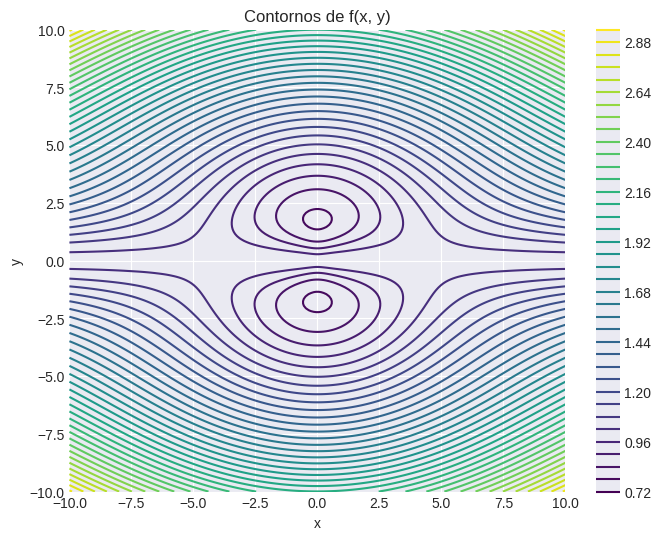

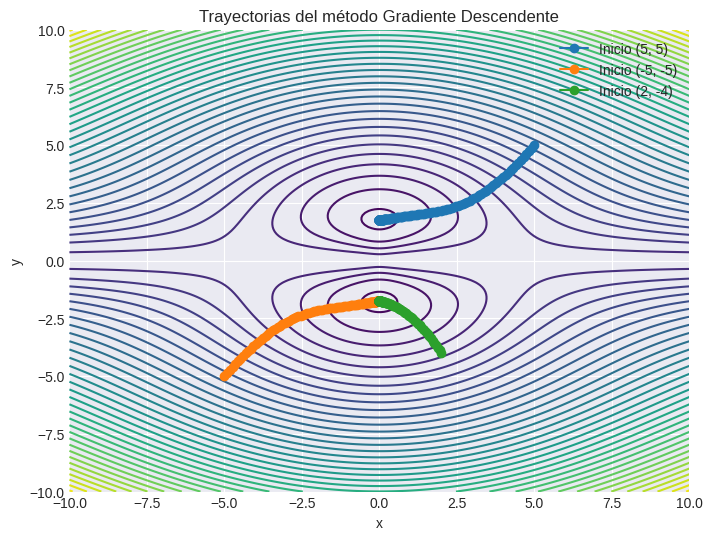

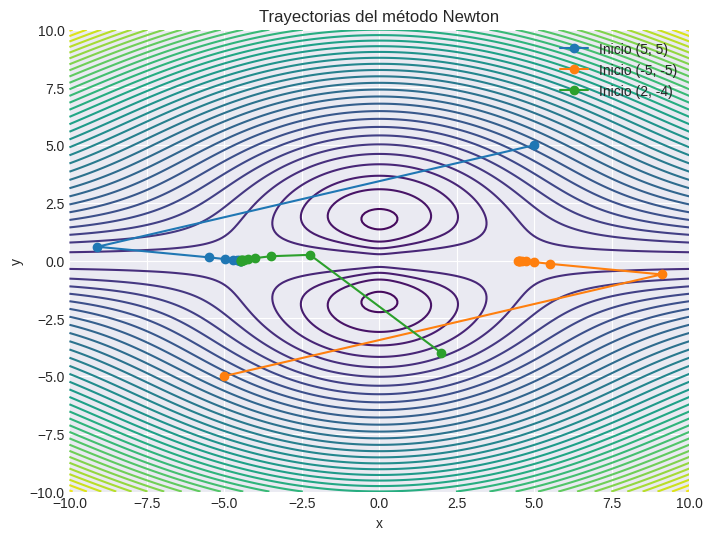

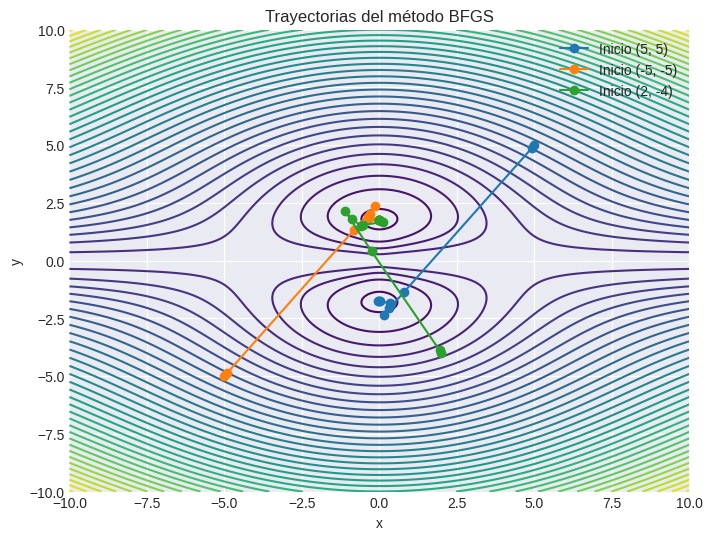

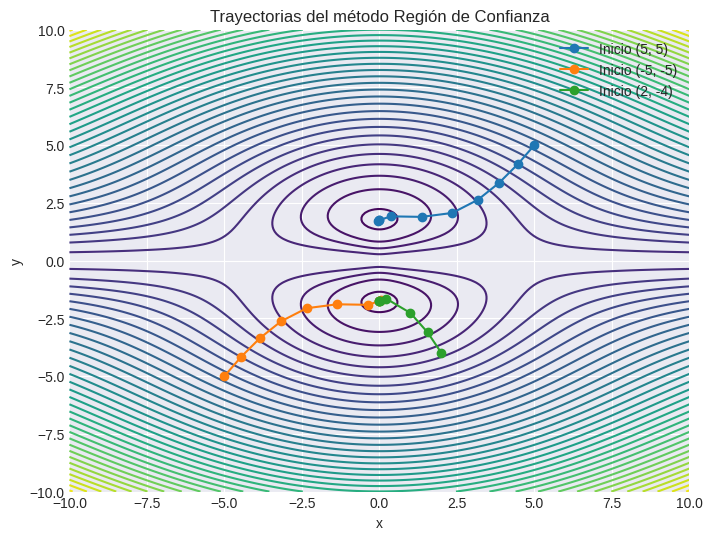

Comparación de puntos finales:
Gradiente Descendente: [1.37667728e-05 1.75964825e+00], f=0.7686998960602309
Newton: [-4.47993634e+00  8.84978312e-04], f=1.0000000002729748
BFGS: [-5.80644160e-07 -1.75964852e+00], f=0.7686998960536124
Región de Confianza: [-4.70359947e-07  1.75964759e+00], f=0.7686998960536289


<lambdifygenerated-14>:2: RuntimeWarning: invalid value encountered in scalar divide
  return [(1/100)*x*((1/20)*x**2 + (1/20)*y**2)**((1/10)*log(y**2 + 1))*log(y**2 + 1)/((1/20)*x**2 + (1/20)*y**2), ((1/20)*x**2 + (1/20)*y**2)**((1/10)*log(y**2 + 1))*((1/5)*y*log((1/20)*x**2 + (1/20)*y**2)/(y**2 + 1) + (1/100)*y*log(y**2 + 1)/((1/20)*x**2 + (1/20)*y**2))]
<lambdifygenerated-14>:2: RuntimeWarning: divide by zero encountered in log
  return [(1/100)*x*((1/20)*x**2 + (1/20)*y**2)**((1/10)*log(y**2 + 1))*log(y**2 + 1)/((1/20)*x**2 + (1/20)*y**2), ((1/20)*x**2 + (1/20)*y**2)**((1/10)*log(y**2 + 1))*((1/5)*y*log((1/20)*x**2 + (1/20)*y**2)/(y**2 + 1) + (1/100)*y*log(y**2 + 1)/((1/20)*x**2 + (1/20)*y**2))]
<lambdifygenerated-14>:2: RuntimeWarning: invalid value encountered in scalar multiply
  return [(1/100)*x*((1/20)*x**2 + (1/20)*y**2)**((1/10)*log(y**2 + 1))*log(y**2 + 1)/((1/20)*x**2 + (1/20)*y**2), ((1/20)*x**2 + (1/20)*y**2)**((1/10)*log(y**2 + 1))*((1/5)*y*log((1/20)*x**2 + (1/20)*y**

CONJUNTO A (malla -5:5)
Punto inicial: (-5, -5)
  GD     -> iters=212,   f=0.768700
  Newton -> iters=9,   f=1.000000
  BFGS   -> iters=10,   f=0.768700
  TR     -> iters=9,   f=0.768700

Punto inicial: (-5, -4)
  GD     -> iters=213,   f=0.768700
  Newton -> iters=14,   f=1.000000
  BFGS   -> iters=11,   f=0.768700
  TR     -> iters=8,   f=0.768700

Punto inicial: (-5, -3)
  GD     -> iters=217,   f=0.768700
  Newton -> iters=6,   f=0.768700
  BFGS   -> iters=11,   f=0.768700
  TR     -> iters=13,   f=1.000000

Punto inicial: (-5, -2)
  GD     -> iters=227,   f=0.768700
  Newton -> iters=9,   f=1.000000
  BFGS   -> iters=29,   f=0.768700
  TR     -> iters=10,   f=1.000000

Punto inicial: (-5, -1)
  GD     -> iters=283,   f=0.768700
  Newton -> iters=7,   f=1.000000
  BFGS   -> iters=16,   f=0.768700
  TR     -> iters=7,   f=1.000000

Punto inicial: (-5, 0)
  GD     -> iters=0,   f=1.000000
  Newton -> iters=0,   f=1.000000
  BFGS   -> iters=0,   f=1.000000
  TR     -> iters=0,   f=1.0

In [5]:
# ================================================================
# Optimización de f(x,y) = ((x^2 + y^2)/20)^((ln(y^2 + 1))/10)
# Métodos: Gradiente Descendente, Newton, Quasi-Newton (BFGS), Región de Confianza
# ================================================================

# --- Importación de librerías necesarias ---
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Configuración estética
plt.style.use('seaborn-v0_8-darkgrid')

# ================================================================
# 1. Definición simbólica de la función, gradiente y Hessiano
# ================================================================
x, y = sp.symbols('x y')
f_expr = ((x**2 + y**2)/20)**(sp.log(y**2 + 1)/10)

# Gradiente y Hessiano simbólicos
grad_f = [sp.diff(f_expr, var) for var in (x, y)]
H_f = sp.hessian(f_expr, (x, y))

# Conversión a funciones numéricas
f = sp.lambdify((x, y), f_expr, 'numpy')
grad = sp.lambdify((x, y), grad_f, 'numpy')
H = sp.lambdify((x, y), H_f, 'numpy')

# ================================================================
# 2. Visualización de la función
# ================================================================
X = np.linspace(-10, 10, 200)
Y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_title('Superficie de f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.savefig('superficie_funcion.png')
plt.show()

# Contornos
plt.figure(figsize=(8,6))
cp = plt.contour(X, Y, Z, levels=40, cmap='viridis')
plt.colorbar(cp)
plt.title('Contornos de f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('contornos_funcion.png')
plt.show()

# ================================================================
# 3. Métodos de optimización
# ================================================================

# --- Gradiente Descendente ---
def gradiente_descendente(x0, tol=1e-6, max_iter=500, alpha=1.0, rho=0.8, c=1e-4):
    xk = np.array(x0, dtype=float)
    traj = [xk.copy()]
    for i in range(max_iter):
        g = np.array(grad(xk[0], xk[1]))
        if np.linalg.norm(g) < tol:
            break
        t = alpha
        while f(xk[0]-t*g[0], xk[1]-t*g[1]) > f(xk[0], xk[1]) - c*t*np.dot(g,g):
            t *= rho
        xk -= t * g
        traj.append(xk.copy())
    return np.array(traj)

# --- Newton ---
def metodo_newton(x0, tol=1e-6, max_iter=100):
    xk = np.array(x0, dtype=float)
    traj = [xk.copy()]
    for i in range(max_iter):
        g = np.array(grad(xk[0], xk[1]))
        Hk = np.array(H(xk[0], xk[1]))
        if np.linalg.norm(g) < tol:
            break
        try:
            pk = -np.linalg.solve(Hk, g)
        except np.linalg.LinAlgError:
            break
        xk += pk
        traj.append(xk.copy())
    return np.array(traj)

# --- BFGS ---
def bfgs(x0, tol=1e-6, max_iter=500):
    xk = np.array(x0, dtype=float)
    Hk = np.eye(2)
    traj = [xk.copy()]

    for _ in range(max_iter):
        gk = np.array(grad(xk[0], xk[1]))
        if np.linalg.norm(gk) < tol:
            break

        pk = -Hk @ gk

        # Line search estable
        alpha = 1.0
        while f(xk[0] + alpha*pk[0], xk[1] + alpha*pk[1]) > f(xk[0], xk[1]) + 1e-4*alpha*np.dot(gk, pk):
            alpha *= 0.5
            if alpha < 1e-8:
                break

        x_new = xk + alpha*pk
        sk = x_new - xk
        yk = np.array(grad(x_new[0], x_new[1])) - gk

        denom = np.dot(yk, sk)

        # --- Corrección NUMÉRICA fundamental ---
        if abs(denom) > 1e-10 and denom > 0:
            rho = 1.0 / denom
            I = np.eye(2)
            Hk = (I - rho*np.outer(sk, yk)) @ Hk @ (I - rho*np.outer(yk, sk)) + rho*np.outer(sk, sk)
        # Si el denominador es cero/negativo se omite actualización (evita tus errores)

        xk = x_new
        traj.append(xk.copy())

    return np.array(traj)

# --- Región de Confianza ---
def region_confianza(x0, tol=1e-6, max_iter=200, delta=1.0):
    xk = np.array(x0, dtype=float)
    traj = [xk.copy()]
    for _ in range(max_iter):
        gk = np.array(grad(xk[0], xk[1]))
        Hk = np.array(H(xk[0], xk[1]))
        if np.linalg.norm(gk) < tol:
            break
        try:
            pk_newton = -np.linalg.solve(Hk, gk)
        except np.linalg.LinAlgError:
            pk_newton = -gk

        pk_sd = -(np.dot(gk,gk)/np.dot(gk, Hk@gk)) * gk

        if np.linalg.norm(pk_newton) <= delta:
            pk = pk_newton
        elif np.linalg.norm(pk_sd) >= delta:
            pk = delta * pk_sd / np.linalg.norm(pk_sd)
        else:
            beta = np.roots([
                np.dot(pk_newton-pk_sd, pk_newton-pk_sd),
                2*np.dot(pk_sd, pk_newton-pk_sd),
                np.dot(pk_sd, pk_sd)-delta**2
            ])
            beta = beta[np.isreal(beta)]
            tau = np.max(beta)
            pk = pk_sd + tau*(pk_newton - pk_sd)

        xk += pk
        traj.append(xk.copy())
    return np.array(traj)

# ================================================================
# 4. Ejecución desde puntos iniciales
# ================================================================
puntos_iniciales = [(5, 5), (-5, -5), (2, -4)]
metodos = {
    "Gradiente Descendente": gradiente_descendente,
    "Newton": metodo_newton,
    "BFGS": bfgs,
    "Región de Confianza": region_confianza
}

# Gráficas de trayectorias
for nombre, metodo in metodos.items():
    plt.figure(figsize=(8,6))
    plt.contour(X, Y, Z, levels=40, cmap='viridis')

    for x0 in puntos_iniciales:
        tray = metodo(x0)
        plt.plot(tray[:,0], tray[:,1], marker='o', label=f'Inicio {x0}')

    plt.title(f'Trayectorias del método {nombre}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.savefig(f'{nombre.lower().replace(" ","_")}_trayectorias.png')
    plt.show()

# ================================================================
# 5. Comparación de puntos finales
# ================================================================
print("Comparación de puntos finales:")
for nombre, metodo in metodos.items():
    punto = metodo((5, 5))[-1]
    print(f"{nombre}: {punto}, f={f(punto[0], punto[1])}")

# ================================================================
# EXPERIMENTOS: Conjuntos A, B y C
# ================================================================

def run_experiments(points, nombre_conjunto):

    def safe_last_value(traj):
        """
        Extrae el último punto de una trayectoria.
        Retorna None si hay NaN/Inf o si la trayectoria es inválida.
        """
        if traj is None or len(traj) == 0:
            return None

        x, y = traj[-1]

        # Verificación robusta
        if (np.isnan(x) or np.isnan(y) or
            np.isinf(x) or np.isinf(y)):
            return None
        
        return (x, y)

    resultados = []

    for p in points:
        entrada = tuple(p)

        # Ejecutar cada método de forma segura
        try:
            traj_gd = gradiente_descendente(entrada)
        except Exception:
            traj_gd = None

        try:
            traj_nt = metodo_newton(entrada)
        except Exception:
            traj_nt = None

        try:
            traj_bfgs = bfgs(entrada)
        except Exception:
            traj_bfgs = None

        try:
            traj_tr = region_confianza(entrada)
        except Exception:
            traj_tr = None

        # Obtener puntos finales robustos
        gd_last = safe_last_value(traj_gd)
        nt_last = safe_last_value(traj_nt)
        bfgs_last = safe_last_value(traj_bfgs)
        tr_last = safe_last_value(traj_tr)

        # Evaluación segura de f
        def safe_f(val):
            if val is None:
                return None
            try:
                fx = f(val[0], val[1])
                if np.isnan(fx) or np.isinf(fx):
                    return None
                return fx
            except Exception:
                return None

        resultados.append({
            "punto": entrada,

            "gd_iters": len(traj_gd)-1 if traj_gd is not None else None,
            "gd_f": safe_f(gd_last),

            "newton_iters": len(traj_nt)-1 if traj_nt is not None else None,
            "newton_f": safe_f(nt_last),

            "bfgs_iters": len(traj_bfgs)-1 if traj_bfgs is not None else None,
            "bfgs_f": safe_f(bfgs_last),

            "trust_iters": len(traj_tr)-1 if traj_tr is not None else None,
            "trust_f": safe_f(tr_last)
        })
    
    print("==============================================================")
    print(nombre_conjunto)
    print("==============================================================")
    for r in resultados:
        print(f"Punto inicial: {r['punto']}")
        gd_iters  = r['gd_iters']  if r['gd_iters']  is not None else "NA"
        gd_f      = f"{r['gd_f']:.6f}" if r['gd_f'] is not None else "NA"

        newton_iters = r['newton_iters'] if r['newton_iters'] is not None else "NA"
        newton_f     = f"{r['newton_f']:.6f}" if r['newton_f'] is not None else "NA"

        bfgs_iters = r['bfgs_iters'] if r['bfgs_iters'] is not None else "NA"
        bfgs_f     = f"{r['bfgs_f']:.6f}" if r['bfgs_f'] is not None else "NA"

        trust_iters = r['trust_iters'] if r['trust_iters'] is not None else "NA"
        trust_f     = f"{r['trust_f']:.6f}" if r['trust_f'] is not None else "NA"

        print(f"  GD     -> iters={gd_iters},   f={gd_f}")
        print(f"  Newton -> iters={newton_iters},   f={newton_f}")
        print(f"  BFGS   -> iters={bfgs_iters},   f={bfgs_f}")
        print(f"  TR     -> iters={trust_iters},   f={trust_f}")
        print()
    return resultados


# ================================================================
# Conjunto A: malla densa alrededor del origen -5..5
# ================================================================
A_points = [(x,y) for x in range(-5,6) for y in range(-5,6)]
A_results = run_experiments(A_points, "CONJUNTO A (malla -5:5)")

# ================================================================
# Conjunto B: 50 puntos aleatorios en [-100,100]^2
# ================================================================
np.random.seed(0)
B_points = np.random.uniform(-100,100,(50,2))
B_results = run_experiments(B_points, "CONJUNTO B (aleatorio 50 pts)")

# ================================================================
# Conjunto C: puntos extremos
# ================================================================
C_points = [
    (100,0),(-100,0),
    (0,100),(0,-100),
    (100,100),(100,-100),
    (-100,100),(-100,-100)
]
C_results = run_experiments(C_points, "CONJUNTO C (puntos extremos)")


To solve the problem, I would install the missing package using the magic command `%pip install numpy`.

Made changes.